In [1]:
import pandas as pd
import csv
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
from copy import deepcopy
import numpy as np
from sklearn.cluster import KMeans
import networkx as nx
import operator
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split 

data = pd.read_csv('cleanFeatures.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)

In [2]:
data.shape

(5743, 39)

In [3]:
data.head()

,ProteinID,FrequencyA,FrequencyC,FrequencyD,FrequencyE,FrequencyF,FrequencyG,FrequencyH,FrequencyI,FrequencyK,...,HarmonicCentrality,Local Clustering Coefficient,Modularity,PageRank,SSfractionHelix,SSfractionTurn,SSfractionSheet,BP,CC,MF
0,P00748,0.544841,2.569691,-0.913502,-0.860238,-0.624291,0.548421,1.678870,-1.586820,-1.139632,...,0.883341,0.883341,0.736007,-0.424373,-0.573348,0.227374,0.227374,-0.566718,-0.185605,-0.601109
1,P09622,0.865940,-0.066382,-0.457007,-0.527986,-0.248247,1.866844,0.236912,1.765667,0.455002,...,-0.709971,-0.709971,-0.238547,-0.357133,0.396657,0.037403,0.037403,-0.553693,-1.350813,-1.149322
2,Q9UGJ0,-0.291238,-0.901086,-0.413211,-0.636871,1.107451,-0.488293,-0.018137,1.031476,0.360262,...,0.606558,0.606558,-0.673415,-0.376694,0.276242,0.814701,0.814701,-0.147412,-0.731582,-0.943992
3,Q9Y6Q6,0.346813,2.375019,-0.121250,-0.012200,-0.627223,1.105463,-0.468733,-1.497474,-0.786536,...,-0.346774,-0.346774,0.466137,-0.520649,-1.298741,1.110046,1.110046,-0.677024,0.689543,0.247697
4,Q02962,0.076916,-0.650226,-0.019627,-1.192335,-0.932011,1.265698,0.770537,-0.127167,-1.042019,...,-0.393095,-0.393095,0.436175,1.359952,-0.436386,1.734393,1.734393,-1.013390,-0.532671,0.715993


In [4]:
data.columns

Index(['ProteinID', 'FrequencyA', 'FrequencyC', 'FrequencyD', 'FrequencyE',
       'FrequencyF', 'FrequencyG', 'FrequencyH', 'FrequencyI', 'FrequencyK',
       'FrequencyL', 'FrequencyM', 'FrequencyN', 'FrequencyP', 'FrequencyQ',
       'FrequencyR', 'FrequencyS', 'FrequencyT', 'FrequencyV', 'FrequencyW',
       'FrequencyY', 'Aromaticity', 'Isoelectric', 'Target',
       'Average Shortest Path to all Disease genes', 'BetweennessCentrality',
       'ClosenessCentrality', 'DegreeCentrality', 'EigenvectorCentrality',
       'HarmonicCentrality', 'Local Clustering Coefficient', 'Modularity',
       'PageRank', 'SSfractionHelix', 'SSfractionTurn', 'SSfractionSheet',
       'BP', 'CC', 'MF'],
      dtype='object')

In [3]:
train_df, val_df = train_test_split(data, test_size=0.1, random_state=2018)
svclassifier = SVC(kernel='linear')  
svclassifier.fit(train_df)

TypeError: fit() missing 1 required positional argument: 'y'

In [12]:
x_data = data.drop(['Target','ProteinID'],axis=1)
y_data = data['Target']

In [16]:
# Fix the error of Unknown datatype 'Continuous'
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
y_encoded = lab_enc.fit_transform(y_data)
print(y_encoded)
print(utils.multiclass.type_of_target(y_data))
print(utils.multiclass.type_of_target(y_data.astype('int')))
print(utils.multiclass.type_of_target(y_encoded))

[1 1 1 ... 0 0 0]
continuous
binary
binary


In [17]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

# Prepare data
X = data.drop(['Target','ProteinID'],axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

NUM_TRIALS = 30

svm = SVC(kernel="rbf")

p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1]}

lab_enc = preprocessing.LabelEncoder()
y_encoded_train = lab_enc.fit_transform(y_train)
print(y_encoded_train)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(y_encoded_train))

y_encoded_test = lab_enc.fit_transform(y_test)
print(y_encoded_test)
print(utils.multiclass.type_of_target(y_test))
print(utils.multiclass.type_of_target(y_test.astype('int')))
print(utils.multiclass.type_of_target(y_encoded_test))

# Prepare parameters
NUM_TRIALS = 30

svm = SVC(kernel="rbf")

p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1]}

non_nested_f1 = np.zeros(NUM_TRIALS)
nested_f1 = np.zeros(NUM_TRIALS)

non_nested_acc = np.zeros(NUM_TRIALS)
nested_acc = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):
    #
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    #
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    clf.fit(X_train, y_train)
    #
    # calculate the score for non_nested
    predicted = clf.predict(X_test)
    y_test_list = y_test.tolist()
    #
    TP = 0
    FP = 0
    FN = 0
    for j in range(len(predicted)):
        if((predicted[j] == 1) and (y_test_list[j] == 1)):
            TP += 1
        if((predicted[j] == 1) and (y_test_list[j] == 0)):
            FP += 1
        if((predicted[j] == 0) and (y_test_list[j] == 1)):
            FN += 1
    #   
    TN = len(predicted) - TP - FP - FN
    #
    F1 = (2*TP)/(2*TP+FP+FN)
    non_nested_f1[i] = F1
    ACC = (TP+TN) / len(predicted)
    non_nested_acc[i] = ACC
    #
    # calculate the score for nested
    nested_scores = cross_val_score(clf, X=X_train, y=y_train, cv=outer_cv)
    nested_acc[i] = nested_scores.mean()

# score_difference = non_nested_scores - nested_scores

# print("Average difference of {0:6f} with std. dev. of {1:6f}."
#       .format(score_difference.mean(), score_difference.std()))



KeyboardInterrupt: 

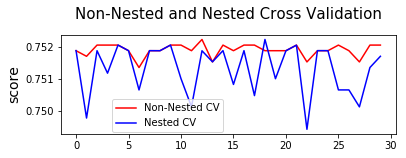

In [20]:
import matplotlib.pyplot as plt
nested_scores = [0.75187379, 0.74978296, 0.75187125, 0.7511745 , 0.75204764,
       0.75187258, 0.75065464, 0.75187343, 0.75187161, 0.75204716,
       0.75100453, 0.75013212, 0.75186967, 0.75152633, 0.75187379,
       0.75082534, 0.75187306, 0.75047873, 0.75222065, 0.75100271,
       0.75187125, 0.75204316, 0.74943331, 0.75187367, 0.75187343,
       0.75065525, 0.75065501, 0.75012945, 0.75134932, 0.75169848]
non_nested_scores = [0.75187184, 0.75169772, 0.75204597, 0.75204597, 0.75204597,
       0.75187184, 0.75134947, 0.75187184, 0.75187184, 0.75204597,
       0.75204597, 0.75187184, 0.75222009, 0.75152359, 0.75204597,
       0.75187184, 0.75204597, 0.75204597, 0.75187184, 0.75187184,
       0.75187184, 0.75204597, 0.75152359, 0.75187184, 0.75187184,
       0.75204597, 0.75187184, 0.75152359, 0.75204597, 0.75204597]

plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_acc, color='r')
nested_line, = plt.plot(nested_acc, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation Accuracy Scores",
          x=.5, y=1.1, fontsize="15")
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np
from sklearn import preprocessing
from sklearn import utils

X = data.drop(['Target','ProteinID'],axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

NUM_TRIALS = 30

svm = SVC(kernel="rbf")

p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1]}

lab_enc = preprocessing.LabelEncoder()
y_encoded_train = lab_enc.fit_transform(y_train)
print(y_encoded_train)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(y_encoded_train))

y_encoded_test = lab_enc.fit_transform(y_test)
print(y_encoded_test)
print(utils.multiclass.type_of_target(y_test))
print(utils.multiclass.type_of_target(y_test.astype('int')))
print(utils.multiclass.type_of_target(y_encoded_test))

non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)


inner_cv = KFold(n_splits=4, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=0)
   
clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
clf.fit(X_train, y_train)

In [ ]:
clf.predict